In [8]:
# Importing all the Libraries

# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Datset

In [14]:
dataset = pd.read_excel('Data_inferenstial_stat.xlsx')
## Printing the number of samples in the dataset:
print('The dataset has {0} samples.'.format(len(dataset)))

## Printing out some few lines:
dataset.head(3)

The dataset has 24 samples.


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


Once we have understood the phenomenon and the data available, we can then characterize the variables we are working with, as follow:

**Independent variable:** the independent variable is the one that does not depend on the sample and that are choosen a priori by the experimenter. In fact, it correspond to the variable we are trying to understand through the experiment. In this case, the independent variable is the condition of the set of words, i.e. whether the words are congruent or not. Put another way, we can imagine our independent variable condition assuming the value 0 when the words are congruents or assuming the value 1 if not.

**Dependent variable:** on the other hand, the dependent variable varies accordingly to each sample. In this problem, it refers to the time to read and say out loud the color in which a set of words is printed.

The distributions for each one of the states of our independent variable can then be described as follow, remembering that population refers to all the people and sample refers only to the subjects participating in the experiment:

Time to read and say out loud the color of the congruent set of words:

Population:  (μc,σc) ;
Sample:  (X¯c,Sc) ;
μc  is the mean time for reading a congruent set of words;
σc  stands for the standard deviation when reading a congruent set of words;
X¯c  is the sample mean time for reading a congruent set of words; and
Sc  is the sample standard deviation when reading a congruent set of words.
Time to read and say out loud the color of the incongruent set of words:

Population:  (μi,σi) ;
Sample:  (X¯i,Si) ;
μi  is the mean time for reading an icongruent set of words;
σi  stands for the standard deviation when reading an icongruent set of words;
X¯i  is the sample mean time for reading an icongruent set of words; and
Si  is the sample standard deviation when reading an icongruent set of words.

**Hypotheses to be explored**
Does the time for reading incongruent words differ from that reading congruent ones?

First of all, since the dataset we are considering has few samples, i.e. less than 30, we will assume that the population fits into a normal distribution. From this assumption we can then consider the sample mean as equivalent to the population mean. However, once we do not have the standard deviation of the population, it will be appropriate to consider a t-distribution.

Furthermore, through the t-test we could infer how different the two population means (simbolized as  μc  and  μi  for congruent and incongruent set of words, respectively) are from each other, considering the measured samples.

We know we are dealing with dependent sample (the subject who reads the congruent set of words is the same that reads the incongruent one), but we are interested in testing for an average difference among them. In [5] this approach of testing is also defined as paired t-Test.

In order to do so, we first need to calculate the difference between the variables:

In [15]:
dataset['Difference'] = dataset['Congruent'] - dataset['Incongruent']
dataset.head(3)

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650


Once we have calculated the difference among the congruent and incongruent distributions, we still can assume it follows a t-distribution having its mean represented by  μd , which is given by  (μd=μc−μi) , and its standard deviation represented by  σd . In the same way, the difference of the sample distributions has a mean time represented by  X¯d  and a standard deviation represented by  Sd .

We then hypothesize as follow:

**Null hypothesis:** the population difference is centered in zero, i.e., the mean time is the same for reading either congruent and incongruent set of words. This definition can be mathematically defined as:
H0:μd=0 

**Alternative hypothesis:**  the population difference is nonzero. If we observe the previous few measurements we notice the time is shorter for reading the congruent set of words, thereby we can hypothesize that reading congruent words is faster than reading the incongruent ones. Mathematically it is the same as obtaining a negative difference. Thus our alternative hypothesis can be narrowed to the following condition:
Ha:μd<0

# Descriptive Statistics

The term statistics here stands for the characteristics of the sample, in the way we could describe them in terms of its central tendency and variability.

The Python Pandas library offers a function to generate the descriptive statistics for a given dataset, summarizing its central tendency, dispersion and shape of the dataset's distribution. For numerical data, as it is the case, this function results in the following statistics: count, mean, std for the standard deviation, min and max values, the lower percentile (25%), the median or 50% percentile, and the upper percentile (75%).

In [17]:
## Obtaining the dataset descriptive statistics:
dataset.describe(include='all')

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


From the values above we can see that in both sample distributions the median is close to the mean value, as it is supposed to be in a normal distribution. Thus it gaves us an idea on how is the central tendency of these distributions. The standard deviation values give us the information on how these distributions are spread out, indicating that the congruent values are closer to their mean.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

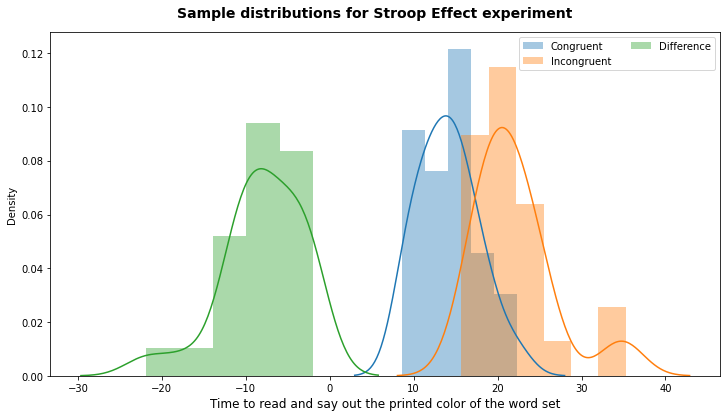

In [18]:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)
plt.suptitle('Sample distributions for Stroop Effect experiment', fontsize=14, fontweight='bold')

sns.distplot(dataset['Congruent'], label='Congruent', ax=ax)
sns.distplot(dataset['Incongruent'], label='Incongruent', ax=ax)
sns.distplot(dataset['Difference'], label='Difference', ax=ax)
ax.legend(ncol=2, loc="upper right", frameon=True)

ax.set_xlabel('Time to read and say out the printed color of the word set', fontsize=12)
plt.show()

These observed descriptive statistics are confirmed in the plot below, where both sample distributions can be visualized. Also, the same observations are valid for the difference distribution ( X¯d ,  Sd ). Despite the outlier measurements in the distribution from incongruent word set and the skewness in the difference, it can be noticed that all of them follow an approximately normal curve.

#3. Hypotheses Test

In this section we will perform a t-test to evaluate the hypotheses 

Hypotheses to test:

H0:μd=0 
Ha:μd<0 
One-tailed t-test with  α  level of  0.05  and dependent sample.

Calculating degrees of freedom

Since we are considering dependent sample, the degrees of freedom (df) are

 found by the following relation:

df=n−1 , where  n  is the number of samples.

In [19]:
n = len(dataset)
df = n-1
print('Degrees of freedom: {}'.format(df))

Degrees of freedom: 23


Calculating the t-test parameters¶
To proceed the test, we need then to calculate the sample mean,  X¯d , and its respective standard deviation  Sd :

In [20]:
## Difference mean
Xd = dataset['Difference'].mean()
print('Sample mean = {}'.format(Xd))
## Difference standard deviation
Sd = dataset['Difference'].std()
print('Sample std = {}'.format(Sd))

Sample mean = -7.964791666666664
Sample std = 4.864826910359054


With these values, we can now calculate the standard error of the mean as follow:
SEM=Sd/n−−√

In [21]:
SEM = Sd / np.sqrt(n)
print('SEM = {}'.format(SEM))

SEM = 0.9930286347783402


Finally, the t-test value is obtained from the relation:
t=X¯dSEM

In [22]:
t = Xd / SEM
print('t-test = {}'.format(t))

t-test = -8.020706944109957


Calculating the p-value
Since we have defined an  α  level, it is know we are considering a p-value less than  α , i.e.  p<0.05 . However, as this analysis runs over a computational platform, its exact value can be determined through the stats module of the SciPy library.


In [23]:
from scipy import stats

In [24]:
p = stats.t.cdf(t, df=df)
print('p-value = {0:.9f}'.format(p))

p-value = 0.000000021


In order to check the consistency of the results we have found, we will use a SciPy function to calculate the t-value and p-value:

In [25]:
stats.ttest_rel(dataset['Congruent'],dataset['Incongruent'])

Ttest_relResult(statistic=-8.020706944109959, pvalue=4.1030005857111556e-08)

Rejecting the null hypothesis

The  tcritical  value is obtained from t-Table and when considering a one-tailed  α=0.05 , it corresponds to  tcritical=−1.714 .

Since the t-test value is much less than t-critical, we reject the null which means we found significant statistics to affirm that people read faster a set of congruent words when compared to incongruent ones, which in turn is an evidence of the Stroop Effect.

Finding the confidence interval

The confidence interval (CI) is calculated from the following relation:
CI=X¯d±ME ,

where  ME  stands for margin of error and is calculated as follow:
ME=tcritical∗SEM

In [26]:
t_critical = 1.714
ME = t_critical*SEM
CI = (Xd-ME, Xd+ME)
print('Confidence interval: ({0:.2f}, {1:.2f})'.format(CI[0], CI[1]))

Confidence interval: (-9.67, -6.26)


The CI above means that in average people read the congruent set of words almost 10 to 6 seconds faster than the incongruent one.

# Conclusion

In this analysis we presented the Stroop Effect and applyed a t-test to collect statistic evidence to support this perceptive phenomenon. In doing so, we have gone through the steps necessary to test a hypothesis as well as gain confidence that the method can be valid even for a small number of samples, provided certain conditions.